Class Exercises. Set 1. Probability and Statistic
1. In Python, simulate the sum of two random variables, X and Y, both uniformly distributed between 0 and 1.

In [2]:
# Import the necessary packages:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
# Assign some arbitrary values for average, variance and number of samples:
n = 1000
average = 0
variance = 1

# Generate the random variables:
X = np.random.normal(average, variance, n)
Y = np.random.normal(average, variance, n)


2. Assume that X is distributed according to the Gaussian density with mean μX = 0 and variance σ2 X = 1; Y is distributed according to the Gaussian density with mean μY = 1 and variance σ2 Y = 1.
* What is the probability density function fX at X = 0?

Answer: Since $p(x)=\frac{1}{\sqrt{2\pi\cdot1}}\exp{(\frac{-x^2}{2\cdot 1^2})}$, thus $p(0)=\frac{1}{\sqrt{2\pi}}$

In [4]:
px = lambda x : scipy.stats.norm.pdf(x, 0, 1)
analytic_px = 1/np.sqrt(2*np.pi)
computed_px = px(0)
print(f"Analytic p(x=0)={analytic_px:.5f}. Computed p(x=0)={computed_px:.5f}")

Analytic p(x=0)=0.39894. Computed p(x=0)=0.39894


* What is the probability density function fY at Y = 0?

Answer: Following the same logic as last question: Since $p(x)=\frac{1}{\sqrt{2\pi\cdot1}}\exp{(\frac{-(x-1)^2}{2\cdot 1^2})}$, thus $p(0)=\frac{1}{\sqrt{2\pi\cdot1}}\exp{(\frac{-(0-1)^2}{2\cdot 1^2})}=\frac{1}{\sqrt{2\pi}}\exp{(-1/2)}$

In [5]:
py = lambda y : scipy.stats.norm.pdf(y, 1, 1)
analytic_py = 1/np.sqrt(2*np.pi) * np.exp(-1/2)
computed_py = py(0)
print(f"Analytic p(y=0)={analytic_py:.5f}. Computed p(y=0)={computed_py:.5f}")

Analytic p(y=0)=0.24197. Computed p(y=0)=0.24197


* Assume the distribution P(Z=z) = 0.5P(X = z)+0.5P(Y = z) known as mixture (i.e., 1/2 of the time
points are generated by the X process and 1/2 of the time by the Y process). If Z = 0, what is the
probability that the X process generated this data point?

Answer: $p(Z=0)=0.5p(y=0)+0.5p(x=0)=\frac{1}{2}\cdot\frac{1}{\sqrt{2\pi}}+\frac{1}{2}\cdot\frac{1}{\sqrt{2\pi}}\exp{(-1/2)}=\frac{1}{2\sqrt{2\pi}}(1+e^{\frac{-1}{2}})$

In [6]:
py = lambda y : scipy.stats.norm.pdf(y, 1, 1)
analytic_mixture = 1/(2*np.sqrt(2*np.pi)) * (1 + np.exp(-1/2))
computed_mixture = px(0) * .5 + py(0) * .5
print(f"Analytic p(z=0)={analytic_mixture:.5f}. Computed p(z=0)={computed_mixture:.5f}")

Analytic p(z=0)=0.32046. Computed p(z=0)=0.32046


3. In Python, simulate the mixture of two random variables, X and Y, X uniformly distributed between 0
and 1 and Y uniformly distributed between 4 and 6. The mixing coefficients are 0.4 and 0.6 respectively.
Play with different values for the mixing coefficients

(-1.0, 7.0)

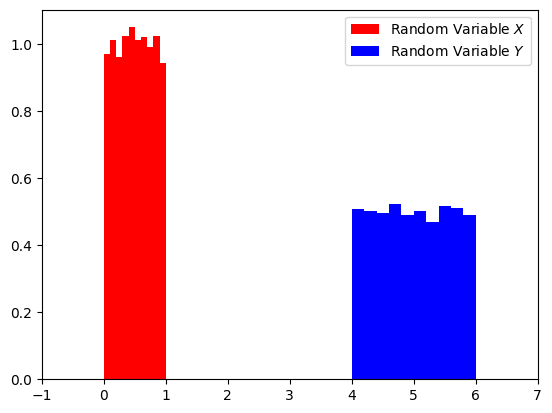

In [7]:
n = 10000
x = np.arange(-5, 5, 1e-3)

X = scipy.stats.uniform.rvs(size=n, loc=0, scale=1)
Y = scipy.stats.uniform.rvs(size=n, loc=4, scale=2)

plt.figure()
plt.hist(X, density=True, color='r', label=r"Random Variable $X$")
plt.hist(Y, density=True, color='b', label=r"Random Variable $Y$")
plt.legend()
plt.xlim([-1, 7])

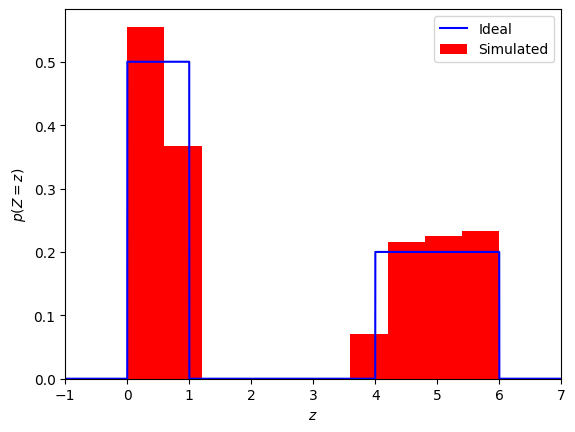

In [8]:
# Generate the distributions:
px = lambda x : scipy.stats.uniform.pdf(x, loc=0, scale=1)
py = lambda y : scipy.stats.uniform.pdf(y, loc=4, scale=2)

# Compute the mixture:
m1 = .5
m2 = .4
pz = lambda z : m1 * px(z) + m2 * py(z)
z = np.arange(-1, 7, 1e-3)

#
n = 10000
Z = scipy.stats.rv_discrete(values=(z,pz(z)/(np.sum(pz(z))))).rvs(size=n)

# Display the mixture result:
plt.plot(z, pz(z), color='b', label=r"Ideal")
plt.hist(Z, density='True', color='r', label=r"Simulated")
plt.xlabel(r"$z$")
plt.ylabel(r"$p(Z=z)$")
plt.xlim([-1, 7])
plt.legend()

4. To estimate the probability of getting heads, p, on the throw of a coin, we repeat the experiment n times,
independently, and we count the number of successes (heads), Y . If X is a random variable with

In [28]:
# Generate the random variable. 0 indicates tails, and 1 heads.
n_span = [10, 1000, 5000, 10000]
P1 = np.zeros(len(n_span))
P2 = np.zeros(len(n_span))
for i, n in enumerate(n_span):
    X = np.random.randint(low=0, high=1+1, size=n)
    
    # As we are seeking heads, the number of sucessful toss is:
    Y = np.sum(X)
    
    # The two estimators are:
    P1[i] = Y/n
    P2[i] = (Y+1)/(n+2)
    
#  A priori value:
real_p = .5


MSE1 = 0.10044505960971896
MSE2 = 0.08386527261082886


5035.0

For a binominal distribution:
$E(X)=n\cdot p$
For the first estimator:
$E(\hat{P_1})=E(\frac{Y}{n})=\frac{1}{n}E(Y)=\frac{1}{n}np=p$
$\therefore Bias(\hat{P_1})=E(P_1)-p=p-p=0$


In [ ]:
# Compute the Bias of both estimators:
bias_1 = P1 - real_p
bias_2 = P2 - real_p
print(f"Bias 1 = {bias_1}")
print(f"Bias 2 = {bias_2}")

# Check if the estimatiors are biased:
mse_p1 = np.linalg.norm(P1 - real_p)
mse_p2 = np.linalg.norm(P2 - real_p)
print(f"MSE1 = {mse_p1}")
print(f"MSE2 = {mse_p2}")

2500.0